#### Read swot l2 pixel cloud data and write out to file. 


In [2]:
import os
import xarray as xr
from glob import glob
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from scripts.swot_readout import swot_pixc_readout


In [3]:
dir_pixc = 'data/swot_l2/pixc/qilu-lake'
path_lake_vec = 'data/lakes-vec/qilu_s2_20240415.gpkg'


In [4]:
## read vector file of the lake.
lake_gpd = gpd.read_file(path_lake_vec).to_crs(epsg=4326)
lake_gpd


,DN,geometry
0,1,"POLYGON ((102.79751 24.20404, 102.7979 24.2040..."


#### (1) swot pixc data reading and checking

In [5]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_pixc, file) for file in os.listdir(dir_pixc) if 'PIXC_' in file and 'readout' not in file]
paths_file = sorted(paths_file)
print(len(paths_file))


235


In [6]:
for i, path in enumerate(paths_file):
  print(f'input file: {i} {path}')
  pix_vars = swot_pixc_readout(path_file=path, vars_sel=None, region_gpd=lake_gpd)


input file: 0 data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_001_396_112R_20230804T083354_20230804T083405_PGC0_01.nc
file read and written to data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_001_396_112R_20230804T083354_20230804T083405_PGC0_01_readout.nc
input file: 1 data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_002_396_112R_20230825T051858_20230825T051909_PGC0_01.nc
file read and written to data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_002_396_112R_20230825T051858_20230825T051909_PGC0_01_readout.nc
input file: 2 data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_003_049_197R_20230902T164610_20230902T164621_PGC0_01.nc
file read and written to data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_003_049_197R_20230902T164610_20230902T164621_PGC0_01_readout.nc
input file: 3 data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_003_396_112R_20230915T020405_20230915T020416_PGC0_01.nc
file read and written to data/swot_l2/pixc/qilu-lake/SWOT_L2_HR_PIXC_003_396_112R_20230915T020405_20230915T020416_PGC0_01_readout.nc
input file: 

In [7]:
file_id = 10
path_file = paths_file[file_id]
path_file_readout = paths_file[file_id].replace('.nc', '_readout.nc')
pixc_nc = xr.open_dataset(path_file, group='pixel_cloud')
pixc_nc_readout = xr.open_dataset(path_file_readout)
pixc_nc


<xarray.Dataset> Size: 1GB
Dimensions:                                (points: 4643561, complex_depth: 2,
                                            num_pixc_lines: 3281)
Coordinates:
    latitude                               (points) float64 37MB ...
    longitude                              (points) float64 37MB ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 37MB ...
    range_index                            (points) float64 37MB ...
    interferogram                          (points, complex_depth) float32 37MB ...
    power_plus_y                           (points) float32 19MB ...
    power_minus_y                          (points) float32 19MB ...
    coherent_power                         (points) float32 19MB ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB ...
    data_window_first_valid                (num_pixc_lines) float64 26kB ...
    data_window_last_valid                 (num_pixc_lines) float64 26kB ...
    data_window_first_cross_track          (num_pixc_lines) float32 13kB ...
    data_window_last_cross_track           (num_pixc_lines) float32 13kB ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3281
    interferogram_size_range:    5688
    looks_to_efflooks:           1.5526657362145722
    num_azimuth_looks:           7.0
    azimuth_offset:              8

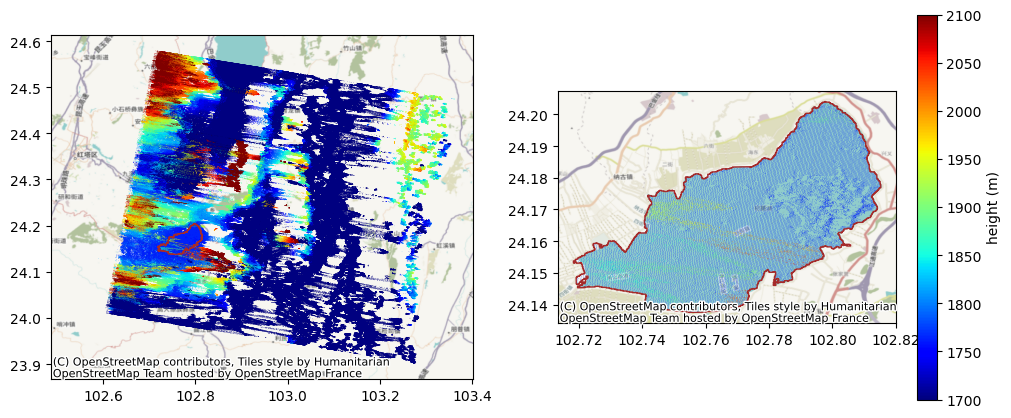

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
# ax1
scat1 = ax[0].scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.height,
           s=0.1, edgecolor='none', cmap='jet', clim=(1700, 2100))
lake_gpd.plot(ax=ax[0], edgecolor='Brown', facecolor='none', linewidth=1)
ctx.add_basemap(ax[0], crs=lake_gpd.crs.to_string())
# ax2
scat2 = ax[1].scatter(x=pixc_nc_readout.longitude, y=pixc_nc_readout.latitude, c=pixc_nc_readout.height,
            s=0.1, edgecolor='none', cmap='jet', clim=(1700, 2100))
lake_gpd.plot(ax=ax[1], edgecolor='Brown', facecolor='none', linewidth=1)
ctx.add_basemap(ax[1], crs=lake_gpd.crs.to_string())
fig.colorbar(scat2).set_label('height (m)')
